<a href="https://colab.research.google.com/github/QuakFooLee/python/blob/main/ML_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

Reference: https://www.youtube.com/playlist?list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v

In [3]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

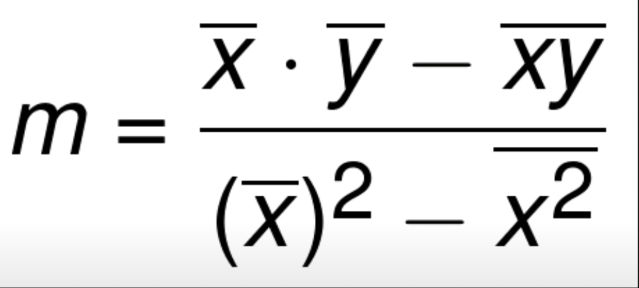

In [34]:
# xs = np.array([1,2,3,4,5,6], dtype=np.float64)
# ys = np.array([5,4,6,5,6,7], dtype=np.float64)

def best_fit_slope(xs,ys):
  term1 = mean(xs)*mean(ys)
  term2 = mean(xs*ys)
  term3 = mean(xs)**2
  term4 = mean(xs**2)
  m = (term1 - term2) /(term3 - term4)
  return m

m = best_fit_slope(xs,ys)

m

# plt.scatter(xs,ys)
# plt.show()

0.42857142857142866

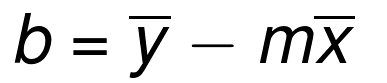

0.42857142857142866 4.0


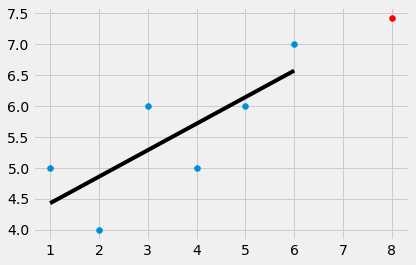

In [35]:
def best_fit_slope(xs,ys):
  term1 = mean(xs)*mean(ys)
  term2 = mean(xs*ys)
  term3 = mean(xs)**2
  term4 = mean(xs**2)
  m = (term1 - term2) /(term3 - term4)
  return m

def best_fit_slope_and_intercept(xs,ys):
  term1 = mean(xs)*mean(ys)
  term2 = mean(xs*ys)
  term3 = mean(xs)**2
  term4 = mean(xs**2)
  m = (term1 - term2) /(term3 - term4)
  b = mean(ys) - m*mean(xs)
  return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m, b)

regression_line = [(m*x)+b for x in xs]

predict_x = 8
predict_y = (m*predict_x)+b

plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y, color='red')
plt.plot(xs, regression_line, color='black')
plt.show()

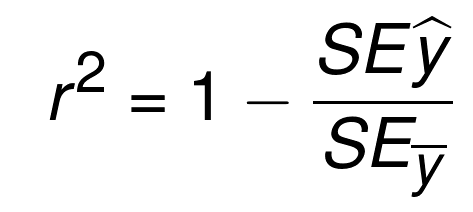

# Full Program

m is  2.0278611632270174
b is 1.0817073170731604


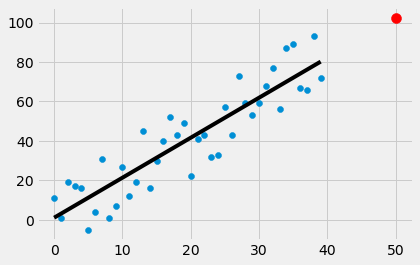

R^2 is: 0.8053586394726955


In [15]:
def create_dataset(hm, variance, step=2, correlation=False):
  val = 1
  ys = []
  for i in range(hm):
    y = val + random.randrange(-variance, variance)
    ys.append(y)
    if correlation and correlation == 'pos':
      val += step
    elif correlation and correlation == 'neg':
      val -= step
  xs = [i for i in range(len(ys))]
  return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
  term1 = mean(xs)*mean(ys)
  term2 = mean(xs*ys)
  term3 = mean(xs)**2
  term4 = mean(xs**2)
  m = (term1 - term2) /(term3 - term4)
  b = mean(ys) - m*mean(xs)
  return m, b

xs, ys = create_dataset(40,20,2, correlation='pos')

m, b = best_fit_slope_and_intercept(xs,ys)

print('m is ', m)
print('b is', b)

regression_line = [(m*x)+b for x in xs]

predict_x = 50
predict_y = (m*predict_x)+b

plt.scatter(xs,ys)
plt.scatter(predict_x, predict_y, color='red', s=100)
plt.plot(xs, regression_line, color='black')
plt.show()

def squared_error(ys_orig, ys_line):  
  return sum((ys_line-ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
  y_mean_line = [mean(ys_orig) for y in ys_orig]
  squared_error_regr = squared_error(ys_orig, ys_line)
  squared_error_y_mean = squared_error(ys_orig, y_mean_line)
  return 1 - (squared_error_regr / squared_error_y_mean)

r_squared = coefficient_of_determination(ys, regression_line)
print('R^2 is:', r_squared)